# Exercise Set 2

**Xiongxiao Wang, Sakshi Pahujani, Mahak Sadhwani**

Due: **10:00 25 April 2022**

Discussion: **13:00 29 April 2022**

**Online submission** at via [ILIAS](https://www.ilias.uni-koeln.de/ilias/goto_uk_exc_4593683.html) in the directory Exercises / Übungen -> Submission of Exercises / Rückgabe des Übungsblätter

# 1. Global $CO_2$ emissions [100 points]

Open the data in `co2-data.csv` to answer the following questions. It contains historical $CO_2$ emissions of each country per capita.

In [1]:
import pandas as pds
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter

file_name = './co2-data.csv'
df = pds.read_csv(file_name)
df.head(5)

,Unnamed: 0,iso_code,country,continent,year,co2,co2_growth_prct,co2_growth_abs,consumption_co2,trade_co2,...,ghg_per_capita,methane,methane_per_capita,nitrous_oxide,nitrous_oxide_per_capita,primary_energy_consumption,energy_per_capita,energy_per_gdp,population,gdp
0,0,AFG,Afghanistan,Asia,1949,0.015,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7663783.0,NaN
1,1,AFG,Afghanistan,Asia,1950,0.084,475.000,0.070,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7752000.0,1.949480e+10
2,2,AFG,Afghanistan,Asia,1951,0.092,8.696,0.007,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7840000.0,2.006385e+10
3,3,AFG,Afghanistan,Asia,1952,0.092,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7936000.0,2.074235e+10
4,4,AFG,Afghanistan,Asia,1953,0.106,16.000,0.015,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8040000.0,2.201546e+10


**a.** Compute the mean $CO_2$ per capita emission in 2017. What is the standard deviation and median? **20 points**

In [2]:
co2_per_capita_2017 = df.loc[df['year'] == 2017]
co2_per_capita_2017.head(5)

,Unnamed: 0,iso_code,country,continent,year,co2,co2_growth_prct,co2_growth_abs,consumption_co2,trade_co2,...,ghg_per_capita,methane,methane_per_capita,nitrous_oxide,nitrous_oxide_per_capita,primary_energy_consumption,energy_per_capita,energy_per_gdp,population,gdp
68,68,AFG,Afghanistan,Asia,2017,6.860,1.708,0.115,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36296000.0,NaN
155,291,ALB,Albania,Europe,2017,5.404,20.212,0.909,6.186,0.782,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2884000.0,NaN
259,395,DZA,Algeria,Africa,2017,153.448,3.097,4.609,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41389000.0,NaN
289,425,AND,Andorra,Europe,2017,0.465,-0.781,-0.004,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,77000.0,NaN
359,495,AGO,Angola,Africa,2017,37.471,9.850,3.360,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29817000.0,NaN


In [3]:
co2_per_capita_2017['co2_per_capita'].mean() # mean

4.87293203883495

In [4]:
co2_per_capita_2017['co2_per_capita'].std() # unbiased standard deviation

5.745929455073027

In [5]:
co2_per_capita_2017['co2_per_capita'].std(ddof=0) #biased standard deviation

5.731966057870995

In [6]:
co2_per_capita_2017['co2_per_capita'].median() # median

2.9515000000000002

The mean CO2 per capita emission in 2017 is 4,87 million tonnes,the standard deviation is 5,75 $（million tonnes）^{2}$, and the median is 2.95 million tonnes

**b.** This compares the data of countries in numerous stages of development. Try separating the data by continent, then calculate the mean, standard deviation, and median in 2017. Show this data in a convenient plot (maybe in a *box plot*). What are the limitations to this data reduction? **30 points**

      continent  co2_per_capita
68         Asia           0.189
155      Europe           1.874
259      Africa           3.707
289      Europe           6.043
359      Africa           1.257
...         ...             ...
20381      Asia           1.930
20400   Oceania             NaN
20470      Asia           0.363
20540    Africa           0.387
20657    Africa           0.720

[209 rows x 2 columns]


Text(0, 0.5, 'co2 emission(million tones per year)')

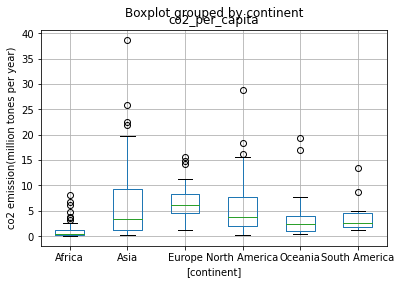

In [7]:
co2_per_capita_2017_continent= co2_per_capita_2017[['continent','co2_per_capita']]
print(co2_per_capita_2017_continent)
ax1=co2_per_capita_2017_continent.boxplot(by='continent')
ax1.set_ylabel('co2 emission(million tones per year)')

In [8]:
# In the columns indexs, 'mean' is mean, 'std' is standard deviation, '50%' is median
co2_per_capita_continent_groupby = co2_per_capita_2017_continent.groupby('continent')#separating the data by continent
co2_per_capita_continent_groupby.describe()#calculate the mean, standard deviation, and median in 2017

co2_per_capita                                              \
                       count      mean       std    min      25%     50%   
continent                                                                  
Africa                  53.0  1.201226  1.802184  0.027  0.16000  0.3960   
Asia                    49.0  6.845694  8.142382  0.189  1.27900  3.4190   
Europe                  43.0  6.774860  3.169785  1.303  4.63800  6.0580   
North America           31.0  6.050452  6.440145  0.298  2.07950  3.6960   
Oceania                 16.0  4.340000  5.702985  0.449  0.94325  2.4250   
South America           14.0  4.028357  3.335294  1.167  1.89275  2.6645   

                                
                   75%     max  
continent                       
Africa         1.25700   8.176  
Asia           9.31500  38.741  
Europe         8.20600  15.626  
North America  7.69950  28.878  
Oceania        3.98350  19.295  
South America  4.51675  13.337

>>The mean CO2 per capita emission in Africa in 2017 is 1.201226 million tonnes,the standard deviation is $1.802184  （𝑚𝑖𝑙𝑙𝑖𝑜𝑛𝑡𝑜𝑛𝑛𝑒𝑠）^{2} $, and the median is 0.3960 million tonnes
>>The mean CO2 per capita emission in Aisa in 2017 is 6.845694 million tonnes,the standard deviation is $8.142382  （𝑚𝑖𝑙𝑙𝑖𝑜𝑛𝑡𝑜𝑛𝑛𝑒𝑠）^{2} $, and the median is 3.4190 million tonnes
>>The mean CO2 per capita emission in Europe in 2017 is 6.774860 million tonnes,the standard deviation is $3.169785（𝑚𝑖𝑙𝑙𝑖𝑜𝑛𝑡𝑜𝑛𝑛𝑒𝑠）^{2} $, and the median is 6.0580 million tonnes
>>The mean CO2 per capita emission in North America in 2017 is 6.050452 million tonnes,the standard deviation is $6.440145 （𝑚𝑖𝑙𝑙𝑖𝑜𝑛𝑡𝑜𝑛𝑛𝑒𝑠）^{2} $, and the median is 3.6960 million tonnes
>>The mean CO2 per capita emission in Oceania in 2017 is 4.340000 million tonnes,the standard deviation is $5.702985  （𝑚𝑖𝑙𝑙𝑖𝑜𝑛𝑡𝑜𝑛𝑛𝑒𝑠）^{2} $, and the median is 2.4250 million tonnes
>>The mean CO2 per capita emission in South America in 2017 is 4.028357 million tonnes,the standard deviation is $3.335294  （𝑚𝑖𝑙𝑙𝑖𝑜𝑛𝑡𝑜𝑛𝑛𝑒𝑠）^{2} $, and the median is 2.6645 million tonnes

**c.** To fully assess the contribution of each country to global emissions, we should look at the cumulative emission. What are the mean, standard deviation, and median of the dataset? Show this information for both the world and separated by continent. **20 points**

In [9]:
df[['continent','cumulative_co2']].groupby('continent').describe() #statistics information of cumulative emission separated by continent

cumulative_co2                                              \
                       count         mean           std    min       25%   
continent                                                                  
Africa                3824.0   300.341422   1440.587225  0.004   2.62025   
Asia                  5128.0  2073.347942  10410.663560  0.000   8.30250   
Europe                6590.0  3910.472644  11877.614654  0.000  19.21900   
North America         2519.0  8141.898006  41762.270858  0.004   1.70400   
Oceania               1136.0   551.261707   2181.376940  0.004   0.61500   
South America         1402.0   791.776566   1845.309646  0.004  15.97375   

                                                 
                    50%         75%         max  
continent                                        
Africa          16.6165    80.53125   20722.289  
Asia           118.8095   773.44525  219985.862  
Europe         270.4970  1847.35825  113884.448  
North America   16.3710   183.82200  410238.263  
Oceania          3.7685    61.02475   18181.941  
South America   82.6695   540.03075   15125.104

In [10]:
df[['continent','cumulative_co2']].describe() # statistics information of cumulative emission about the world

,cumulative_co2
count,20599.000000
mean,2902.878474
std,17085.345894
min,0.000000
25%,4.791500
50%,60.419000
75%,644.539000
max,410238.263000


**d.** We can also look at this history of $CO_2$ emissions by each country. Calculate the mean and standard deviation of the annual emission for the U.S., U.K., Germany, and China. Is this metric useful? In which year was the peak emission from these countries? Are they starting to gain control of their emissions? **30 points**

In [11]:
# get the co2 emission only from the four countries
co2_country_years = df[['country','co2','year']].loc[df['country'].isin(['United States','United Kingdom','Germany','China'])]
co2_country_years

,country,co2,year
3971,China,0.095,1899
3972,China,0.095,1902
3973,China,1.964,1903
3974,China,2.088,1904
3975,China,2.297,1905
...,...,...,...
19806,United States,5412.432,2015
19807,United States,5292.268,2016
19808,United States,5253.606,2017
19809,United States,5424.882,2018


In [12]:
co2_country_years[['country','co2']].groupby('country').describe()#Calculate the mean and standard deviation of the annual emission for the U.S., U.K., Germany, and China.

co2                                                        \
                count         mean          std    min       25%        50%   
country                                                                       
China           119.0  1848.620706  2890.360371  0.095  34.60100   435.7040   
Germany         228.0   403.418079   382.868824  0.443  13.78500   329.3440   
United Kingdom  270.0   288.280374   225.313168  9.351  41.94775   315.1280   
United States   220.0  1864.719400  2065.292513  0.253  36.91050  1231.4285   

                                       
                       75%        max  
country                                
China           2403.83700  10174.681  
Germany          787.54025   1117.882  
United Kingdom   482.72500    660.388  
United States   3286.61450   6131.893

country
China             AxesSubplot(0.125,0.125;0.775x0.755)
Germany           AxesSubplot(0.125,0.125;0.775x0.755)
United Kingdom    AxesSubplot(0.125,0.125;0.775x0.755)
United States     AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

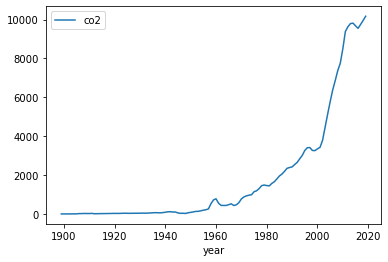

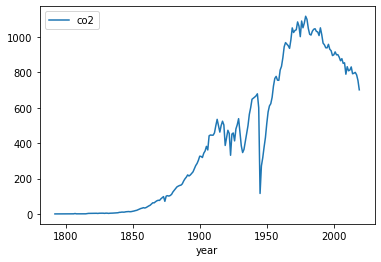

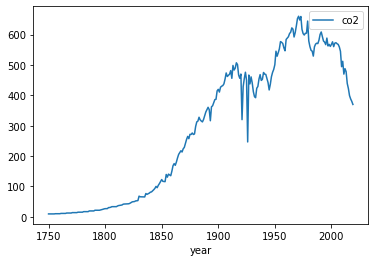

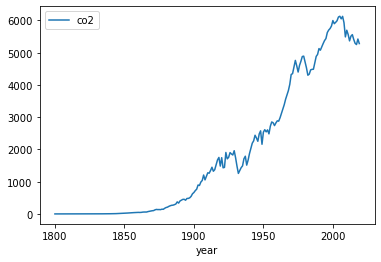

In [13]:
co2_country_years.groupby('country').plot(x='year',y='co2')

In [14]:
co2_country_years_idxmax=co2_country_years.groupby('country')['co2'].idxmax() #get the index of the max emission of different countries
co2_country_years_idxmax

country
China              4089
Germany            7212
United Kingdom    19542
United States     19796
Name: co2, dtype: int64

In [15]:
co2_china_year_max = co2_country_years.loc[4089]  # China peaked at 2019 and didn't start to control
co2_china_year_max

country        China
co2        10174.681
year            2019
Name: 4089, dtype: object

In [16]:
co2_germany_year_max = co2_country_years.loc[7212] # Germany peaked at 1979, and has already started to control since 1979
co2_germany_year_max

country     Germany
co2        1117.882
year           1979
Name: 7212, dtype: object

In [17]:
co2_UK_year_max = co2_country_years.loc[19542]  # UK peaked at 1971, and has already started to control since 1971
co2_UK_year_max

country    United Kingdom
co2               660.388
year                 1971
Name: 19542, dtype: object

In [18]:
co2_USA_year_max = co2_country_years.loc[19796] #USA peaked at 2005,and has already started to control since 2005
co2_USA_year_max

country    United States
co2             6131.893
year                2005
Name: 19796, dtype: object